<a href="https://colab.research.google.com/github/fedIce/CriminalDilemmaChallenge/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
#download data
!git clone https://github.com/rslim087a/track

fatal: destination path 'track' already exists and is not an empty directory.


In [46]:
!pip install imgaug
# !pip uninstall "numpy"


In [84]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Conv2D, Dropout
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import ntpath
import random
import os
import pandas as pd
# 1.26.4

In [48]:
import imgaug.augmenters as iaa

# NP_FLOAT_TYPES = {np.float16, np.float32, np.float64}
# NP_INT_TYPES = {np.int8, np.int16, np.int32, np.int64}
# NP_UINT_TYPES = {np.uint8, np.uint16, np.uint32, np.uint64}

In [49]:
datadir = 'track'
columns = ['center', 'left', 'right','sterring','throttle','reverse','speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', 1)
data.head()

center  \
0  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg   

                                                                   left  \
0  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_860.jpg   

                                                                   right  \
0  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_860.jpg   

   sterring  throttle  reverse     speed  
0  0.0       0.0       0.0      0.649786  
1  0.0       0.0       0.0      0.627942  
2  0.0       0.0       0.0      0.622910  
3  0.0       0.0       0.0      0.619162  
4  0.0       0.0       0.0      0.615438

In [50]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail


data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

center                              left  \
0  center_2018_07_16_17_11_43_382.jpg  left_2018_07_16_17_11_43_382.jpg   
1  center_2018_07_16_17_11_43_670.jpg  left_2018_07_16_17_11_43_670.jpg   
2  center_2018_07_16_17_11_43_724.jpg  left_2018_07_16_17_11_43_724.jpg   
3  center_2018_07_16_17_11_43_792.jpg  left_2018_07_16_17_11_43_792.jpg   
4  center_2018_07_16_17_11_43_860.jpg  left_2018_07_16_17_11_43_860.jpg   

                               right  sterring  throttle  reverse     speed  
0  right_2018_07_16_17_11_43_382.jpg  0.0       0.0       0.0      0.649786  
1  right_2018_07_16_17_11_43_670.jpg  0.0       0.0       0.0      0.627942  
2  right_2018_07_16_17_11_43_724.jpg  0.0       0.0       0.0      0.622910  
3  right_2018_07_16_17_11_43_792.jpg  0.0       0.0       0.0      0.619162  
4  right_2018_07_16_17_11_43_860.jpg  0.0       0.0       0.0      0.615438

In [51]:
data['sterring'].min()

-1.0

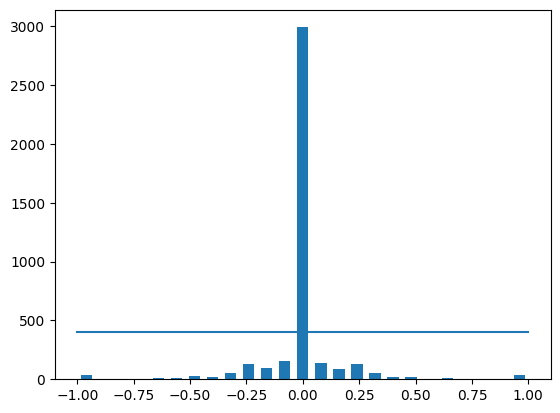

In [52]:
num_of_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(data['sterring'], num_of_bins)
center = (bins[:-1] + bins[1:]) * 0.5
# print((bins[:-1] + bins[1:])*0.1)
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['sterring']), np.max(data['sterring'])), (samples_per_bin, samples_per_bin))

In [53]:
print("total data", len(data))
print(data.shape)

total data 4053
(4053, 7)


In [54]:
remove_list = []
for j in range(num_of_bins):
  list_ = []
  for i in range(len(data['sterring'])):
    if data['sterring'][i] >= bins[j] and data['sterring'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

print(bins)
print('removed:', len(remove_list))
print(len(data['sterring']), num_of_bins)
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]
removed: 2590
4053 25
remaining: 1463


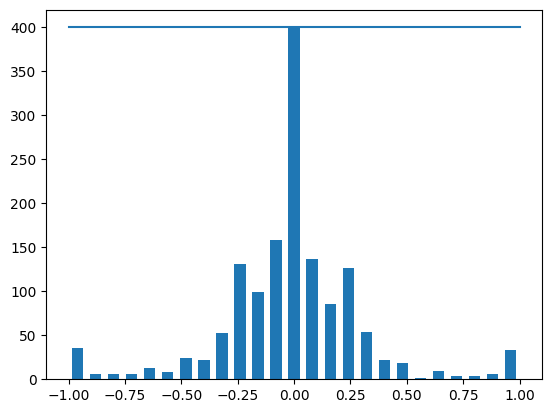

In [55]:
hist, _ = np.histogram(data['sterring'], num_of_bins)
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['sterring']), np.max(data['sterring'])), (samples_per_bin, samples_per_bin))

In [56]:
def load_image_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))

    # left image append
    image_path.append(os.path.join(datadir, left.strip()))
    steering.append(float(indexed_data[3]) + 0.15)

    # right image append
    image_path.append(os.path.join(datadir, right.strip()))
    steering.append(float(indexed_data[3]) - 0.15)
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

In [57]:
data.head()

center                              left  \
4   center_2018_07_16_17_11_43_860.jpg  left_2018_07_16_17_11_43_860.jpg   
12  center_2018_07_16_17_11_44_413.jpg  left_2018_07_16_17_11_44_413.jpg   
13  center_2018_07_16_17_11_44_485.jpg  left_2018_07_16_17_11_44_485.jpg   
14  center_2018_07_16_17_11_44_558.jpg  left_2018_07_16_17_11_44_558.jpg   
15  center_2018_07_16_17_11_44_627.jpg  left_2018_07_16_17_11_44_627.jpg   

                                right  sterring  throttle  reverse     speed  
4   right_2018_07_16_17_11_43_860.jpg  0.000000  0.000000  0.0      0.615438  
12  right_2018_07_16_17_11_44_413.jpg -0.050000  0.642727  0.0      1.434013  
13  right_2018_07_16_17_11_44_485.jpg -0.250000  0.863326  0.0      2.173052  
14  right_2018_07_16_17_11_44_558.jpg -0.400000  1.000000  0.0      2.864847  
15  right_2018_07_16_17_11_44_627.jpg -0.535431  1.000000  0.0      3.791584

In [58]:
image_paths, steerings = load_image_steering(datadir + '/IMG', data)

<ipython-input-56-6b59362aa2fa>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
<ipython-input-56-6b59362aa2fa>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  steering.append(float(indexed_data[3]))
<ipython-input-56-6b59362aa2fa>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  steering.append(float(indexed_data[3]) + 0.15)
<ipython-input-56-6b59362aa2fa>:1

In [59]:
X_train, X_valid, Y_train, Y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print(f'Training Samples: {len(X_train)} \n Valid Samples: {len(X_valid)}')

Training Samples: 3511 
 Valid Samples: 878


Text(0.5, 1.0, 'Validation Set')

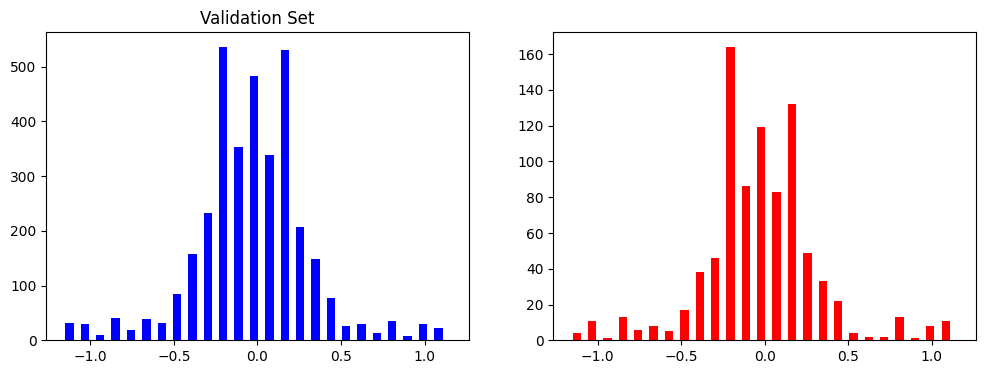

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(Y_train, bins=num_of_bins, width=0.05, color='blue')
axes[0].set_title("Training Set")
axes[1].hist(Y_valid, bins=num_of_bins, width=0.05, color='red')
axes[0].set_title("Validation Set")

In [61]:
def visualize_image(func, op = "change", with_steering=False):
  random_index = random.randint(1, 1000)
  image = image_paths[random_index]
  original_image = mpimg.imread(image)
  steering_angle = steerings[random_index]
  flipped_steering_angle = None
  if with_steering:
    changed_image, flipped_steering_angle = func(original_image, steering_angle)
  else:
    changed_image = func(original_image)

  fig, axs = plt.subplots(1, 2, figsize=(15, 10))
  fig.tight_layout()

  axs[0].imshow(original_image)
  axs[0].set_title(f'Original Image {f" - Steering Angle {steering_angle}"if flipped_steering_angle else ""}')

  axs[1].imshow(changed_image)
  axs[1].set_title(f'{op}ed Image {f" - Steering Angle {flipped_steering_angle}"if flipped_steering_angle else ""}')

In [62]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image


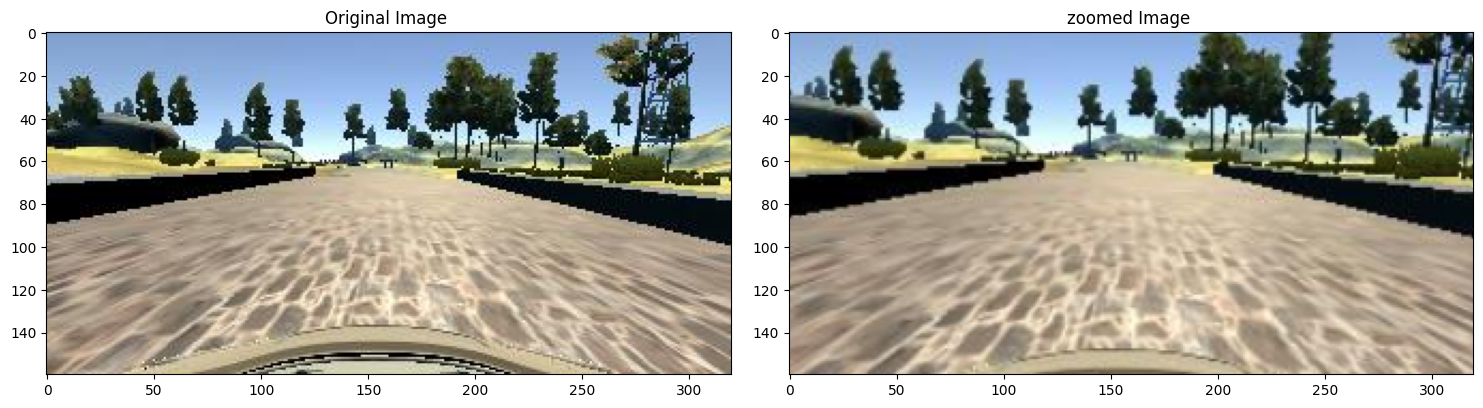

In [63]:
visualize_image(zoom, 'zoom')

In [64]:
def pan(image):
  pan = iaa.Affine(translate_percent= {"x": (-0.1, 0.1), "y": (-0.1, 0.1) })
  image = pan.augment_image(image)
  return image

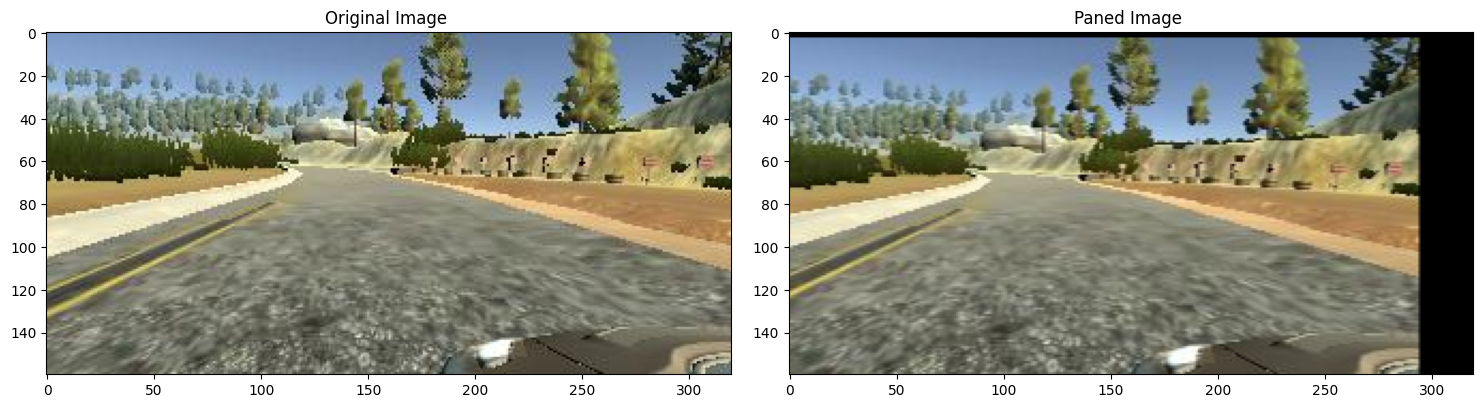

In [65]:
visualize_image(pan, "Pan")

In [66]:
def img_random_brightness(image):
  brightness = iaa.Multiply((0.2, 1.2))
  image = brightness.augment_image(image)
  return image

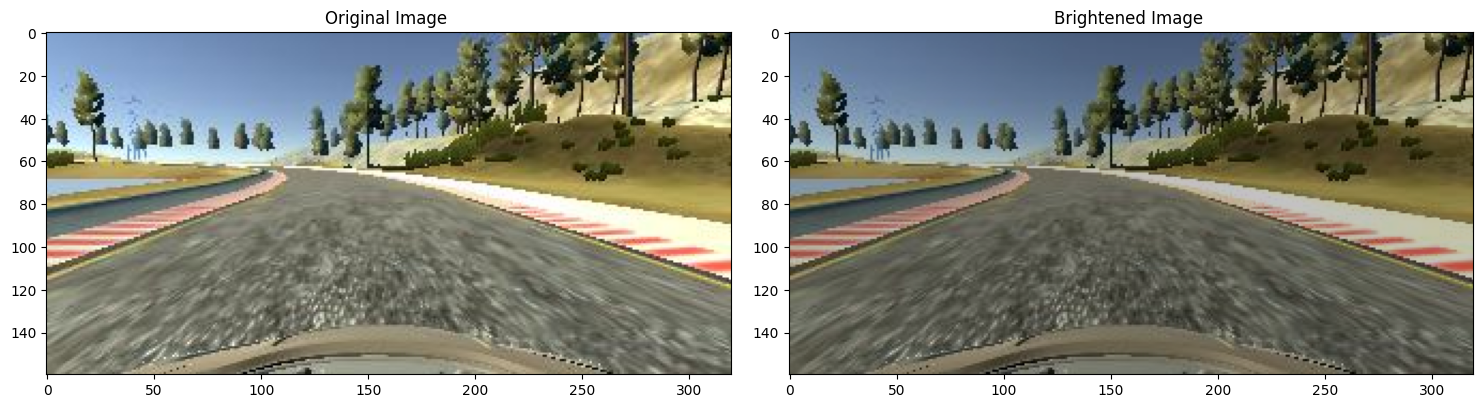

In [67]:
visualize_image(img_random_brightness, "Brighten")

In [68]:
def img_random_flip(image, steering_angle):
  image = cv2.flip(image, 1)
  steering_angle = -steering_angle
  return image, steering_angle


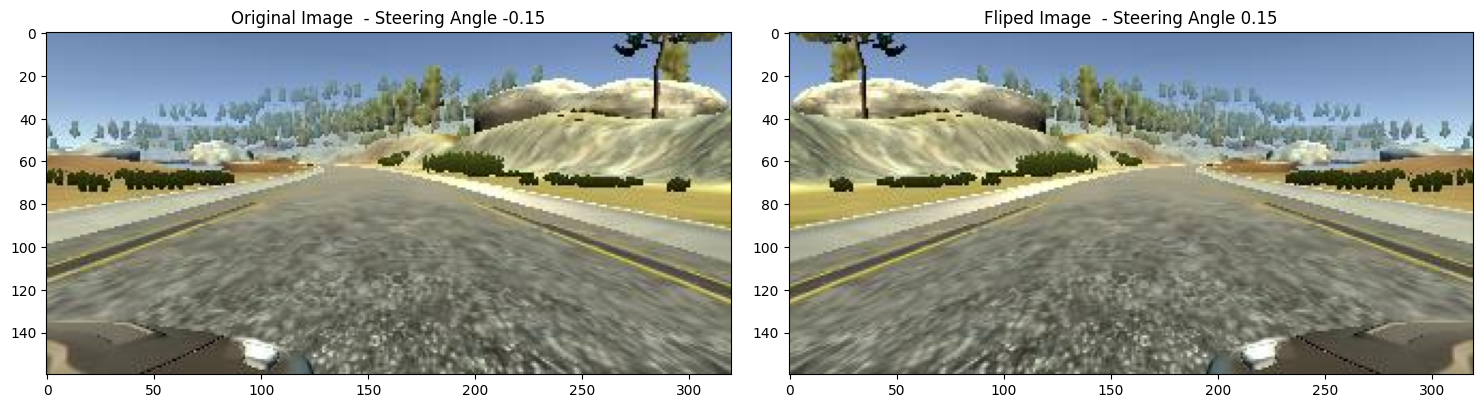

In [69]:
visualize_image(img_random_flip, 'Flip', True )

In [70]:
def random_argument():
  for f in [pan, zoom, img_random_brightness, img_random_flip]:
    if np.random.rand() < 0.5:
      if f.__name__ in ["pan", "zoom","img_random_brightness"]:
        visualize_image(f, f.__name__)
      else:
        visualize_image(f, f.__name__, True)

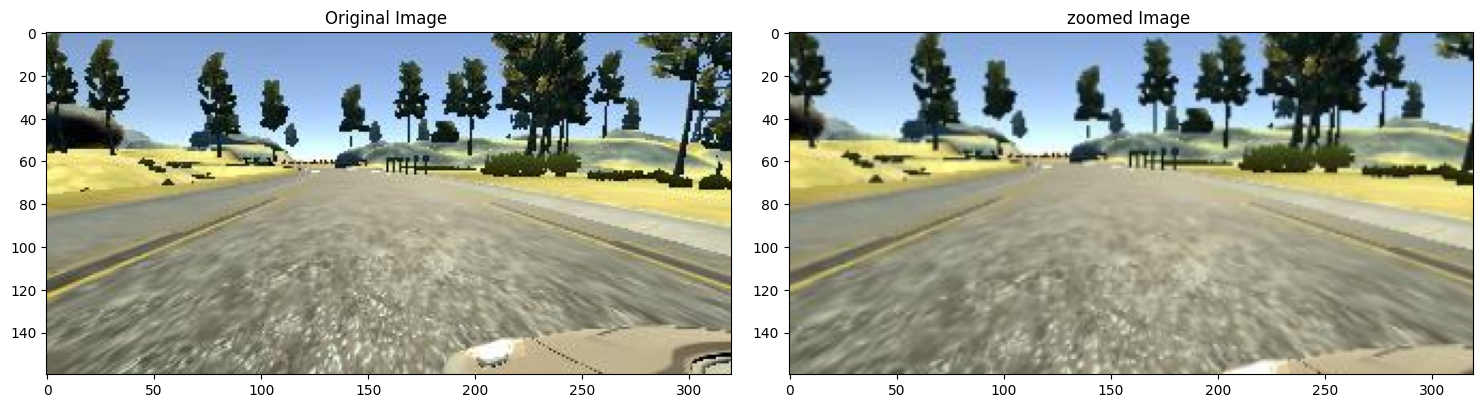

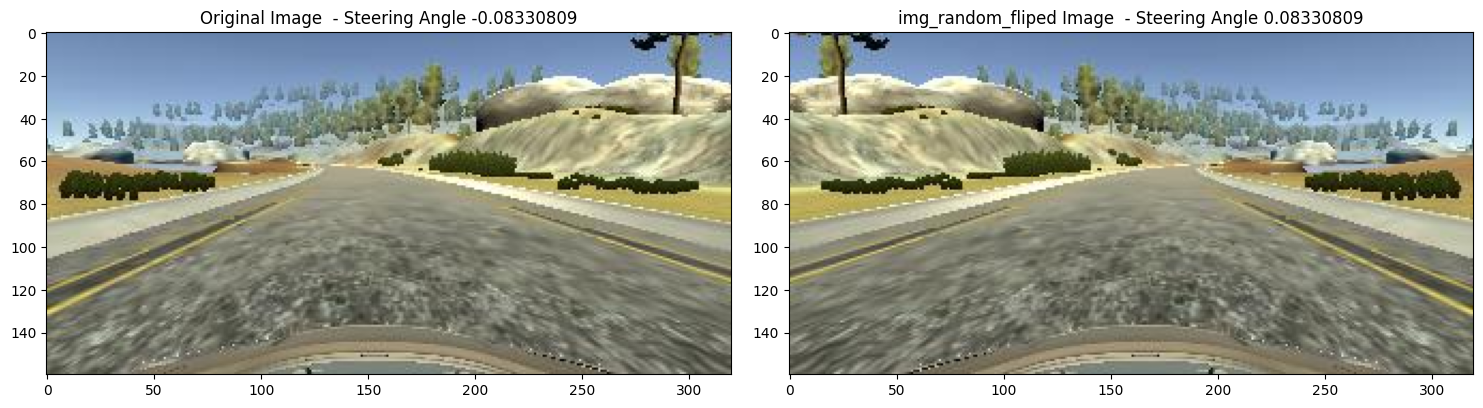

In [71]:
random_argument()

In [72]:
def random_arugment(image, steering_angle):
  image = mpimg.imread(image)
  if np.random.rand() < 0.5:
    image = pan(image)

  if np.random.rand() < 0.5:
    image = zoom(image)

  if np.random.rand() < 0.5:
    image = img_random_brightness(image)

  if np.random.rand() < 0.5:
    image, steering_angle = img_random_flip(image, steering_angle)


  return image, steering_angle

In [73]:
def img_preprocess(img):
  img = img[60:135,:,:]
  img = cv2.cvtColor(img,  cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img, (3,3), 0)
  img = cv2.resize(img, (200, 66)) #Nvidia ML model required dimensions
  img = img/255
  return img

Text(0.5, 1.0, 'Preprocessed Image')

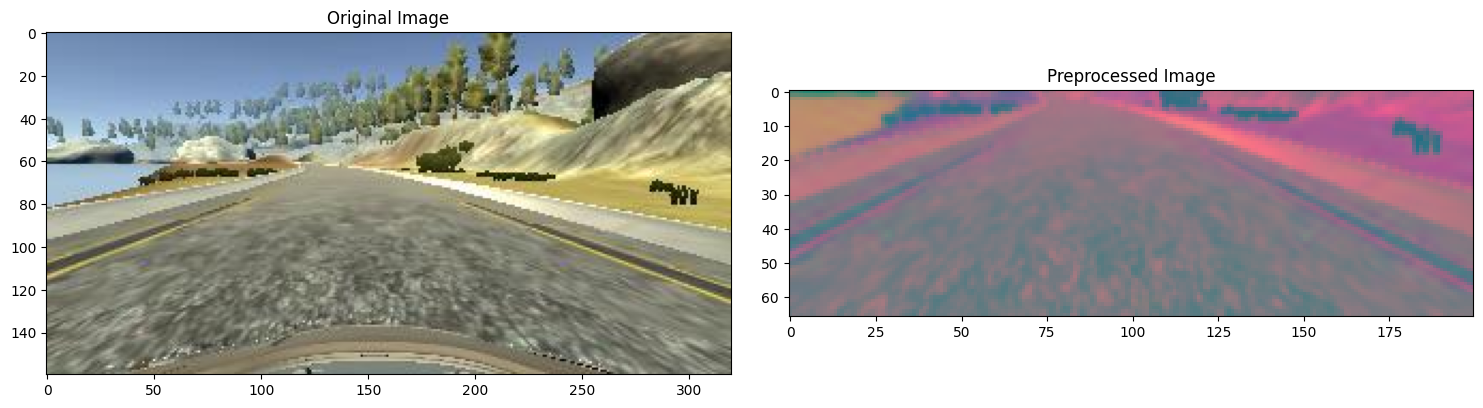

In [74]:
image = image_paths[300]
original_image = mpimg.imread(image)
preproccessed_image = img_preprocess(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title("Original Image")

axs[1].imshow(preproccessed_image)
axs[1].set_title("Preprocessed Image")

In [75]:
!nvidia-smi

Thu Jun  5 12:48:34 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [81]:
def batch_generator(image_paths, steering_ang, batch_size, isTraining):

  while True:
    batch_img = []
    batch_steering = []

    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)

      if isTraining:
        im, steering = random_arugment(image_paths[random_index], steering_ang[random_index])

      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]

      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)

    yield (np.asarray(batch_img), np.asarray(batch_steering))

In [82]:
x_train_gen, y_train_gen = next(batch_generator(X_train, Y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, Y_valid, 1, 0))

Text(0.5, 1.0, 'Validation Image')

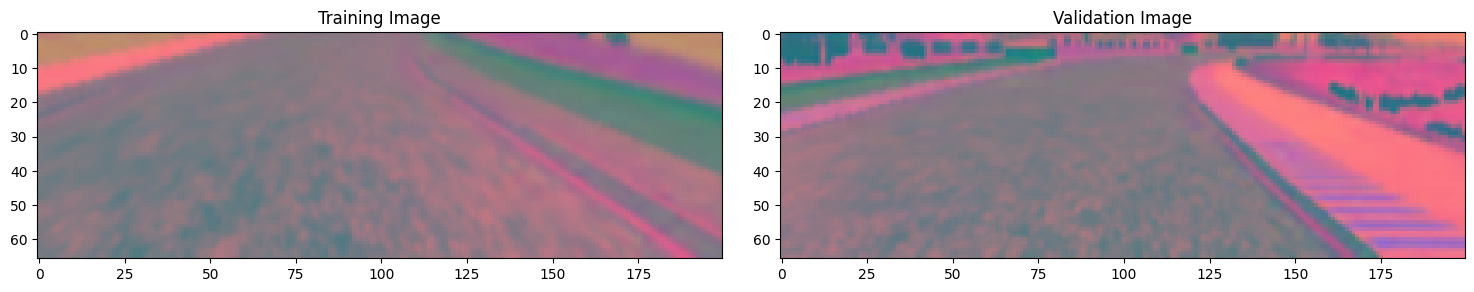

In [83]:
fig, axs = plt.subplots(1,2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(x_train_gen[0])
axs[0].set_title("Training Image")

axs[1].imshow(x_valid_gen[0])
axs[1].set_title("Validation Image")

In [86]:
def nvidia_model():
  model = Sequential()
  model.add(Conv2D(24, (5,5), strides=(2,2), input_shape=(66, 200, 3), activation='elu'))
  model.add(Conv2D(36, (5, 5), strides=(2, 2), activation='elu'))
  model.add(Conv2D(48, (5, 5), strides=(2, 2), activation='elu'))
  model.add(Conv2D(64, (5, 5), activation='elu'))
  # model.add(Conv2D(64, (3, 3), activation='elu'))
  # model.add(Dropout(0.5))

  model.add(Flatten())
  # model.add(Dropout(0.5))

  model.add(Dense(50, activation='elu'))
  # model.add(Dropout(0.5))


  model.add(Dense(10, activation='elu'))
  # model.add(Dropout(0.5))

  model.add(Dense(1))

  optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
  model.compile(loss='mse', optimizer=optimizer)
  return model


model = nvidia_model()
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 31, 98, 24)     │         1,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 47, 36)     │        21,636 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 22, 48)      │        43,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 1, 18, 64)      │        76,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │        57,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,743 (788.06 KB)

 Trainable params: 201,743 (788.06 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
history = model.fit(batch_generator(X_train, Y_train, 100, 1),
                              steps_per_epoch = 300,
                              epochs = 50,
                              validation_data = batch_generator(X_valid, Y_valid, 100, 0),
                              validation_steps = 200,
                              verbose=1,
                              shuffle = 1)

Epoch 1/50
 67/300 ━━━━━━━━━━━━━━━━━━━━ 1:00 259ms/step - loss: 1.0002